In [1]:
# import the necessary packages
import numpy as np # matrix operations
import pandas as pd # dataframes
import seaborn as sns 
import matplotlib.pyplot as plt # plots
from sklearn.datasets import load_boston # dataset
import warnings # ignore package warnings
warnings.filterwarnings('ignore')

# load the data and print description about them
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
# print feature names used in the data
boston.feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

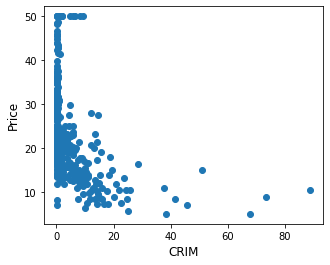

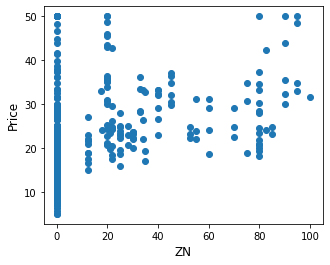

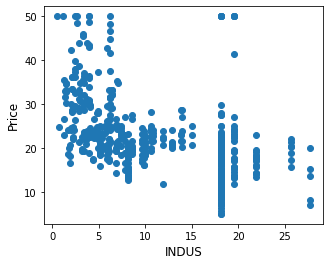

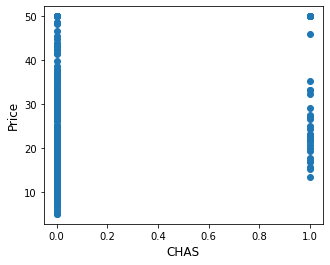

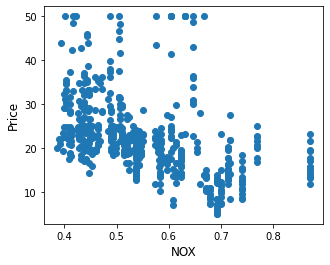

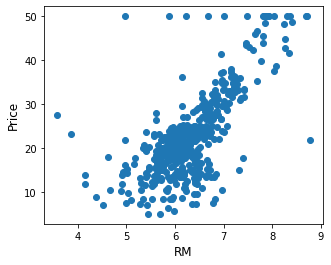

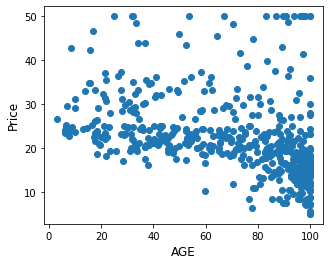

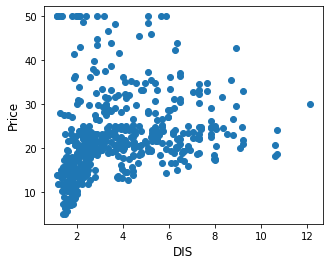

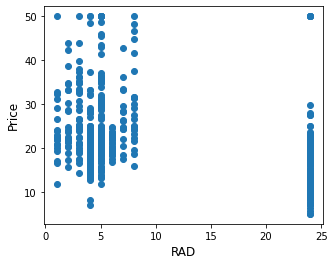

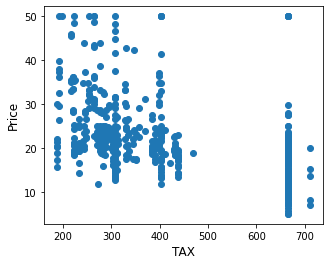

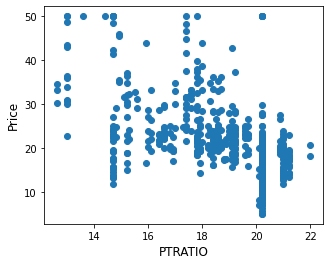

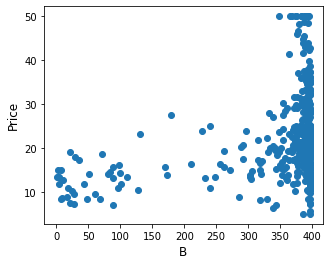

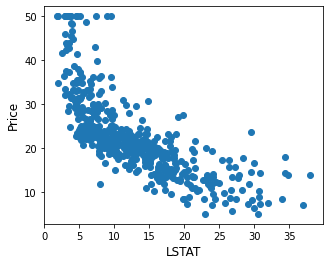

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# the following code shows the relation between house prices (output) and each feature used.
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()
    
boston_data = pd.DataFrame(data=boston['data'],columns=boston['feature_names'])
boston_data["MEDV"] = boston['target']
boston_data

In [4]:
X = boston_data["RM"]
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [5]:
# function to perform the prediction by multiplying the inputs with weights
def predictPrice(X,W):
    return np.dot(X,W)

In [6]:
# function to calculate the cost (here we use MSE)
def calculateCost(X,W,Y):
    prediction = predictPrice(X,W)
    return ((Y - prediction)**2).mean() / 2

In [7]:
# function to plot the predicted line vs real data
def plot_line(X,W,Y,info):
    y_vals = predictPrice(X,W)
    # changement: afin de faciliter les plots quand la variable change.
    if info == 'RM': plt.xlabel('Number of rooms in the house (RM)')
    if info == 'NOX': plt.xlabel('Nitric oxides concentration (parts per 10 million) (NOX)')
    if info == 'LSTAT': plt.xlabel(' Lower status of the population (LSTAT)')
    
    plt.ylabel('Price of house (MEDV)')
    plt.scatter(X[:,1],Y,color='red',label='Actual')
    plt.plot(X[:,1],y_vals,color='black',label='Predicted')
    plt.legend(loc='upper left')
    plt.show()

In [8]:
# function to plot cost variations as the algorithm iterate
def plot_cost(cost):
  plt.plot(range(1,len(cost)+1),cost)
  plt.xlabel('Iterations')
  plt.ylabel('Cost')
  plt.show()

In [9]:
# function that applies Gradient Descent and fit the algorithm
def fit(n_iter,X,Y,info):
  W0 = []
  W1 = []
  costs = []
  N = len(boston['target'])
  W = np.zeros(2)
  c = 0
  for i in range(n_iter):
      pred = predictPrice(X,W)
      W[0] += (2/N) * (Y - pred).mean()
      W[1] += (2/N) * ((Y-pred) * X[:,1]).mean()
      W = np.array([W[0],W[1]])
      J = calculateCost(X,W,Y)
      W0.append(W[0])
      W1.append(W[1])
      costs.append(J)
      c = i+1
      if i%5000 == 0:
          print(f"Iteration: {i}, Cost = {J}, Weights = {W}")
          plot_line(X,W,Y,info)
  print(f"Iteration: {c}, Cost = {J}, Weights = {W}")
  plot_line(X,W,Y,info)
  plot_cost(costs)

[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 ...
 [1.    6.976]
 [1.    6.794]
 [1.    6.03 ]]
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64
Iteration: 0, Cost = 216.69835421878338, Weights = [0.08906248 0.57745065]


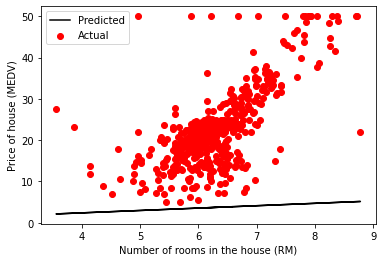

Iteration: 5000, Cost = 26.55376503987035, Weights = [-6.89252067  4.73525082]


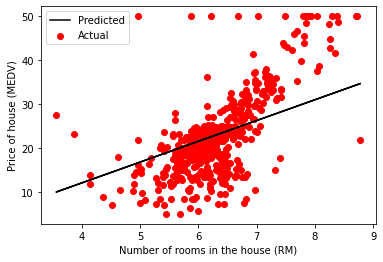

Iteration: 10000, Cost = 24.755652186394848, Weights = [-12.76766742   5.65885367]


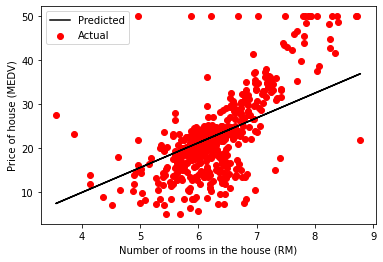

Iteration: 15000, Cost = 23.637715458054487, Weights = [-17.40020402   6.38711191]


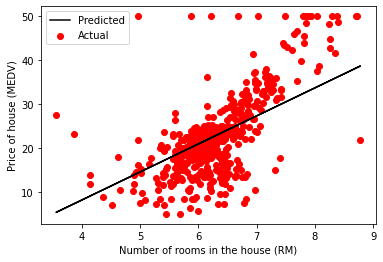

Iteration: 20000, Cost = 22.94266312796479, Weights = [-21.05294602   6.96134147]


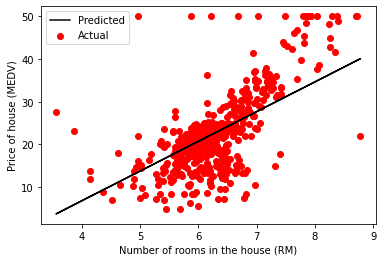

Iteration: 25000, Cost = 22.51052977970248, Weights = [-23.93312276   7.41411986]


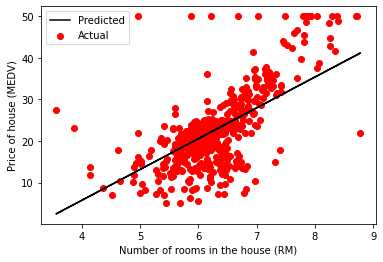

Iteration: 30000, Cost = 22.241860468635963, Weights = [-26.20413396   7.77113433]


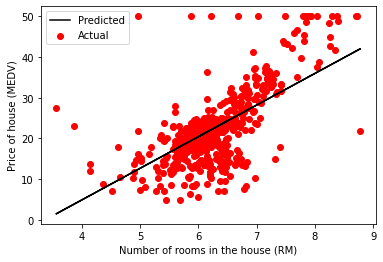

Iteration: 35000, Cost = 22.07482129195769, Weights = [-27.99481987   8.05263924]


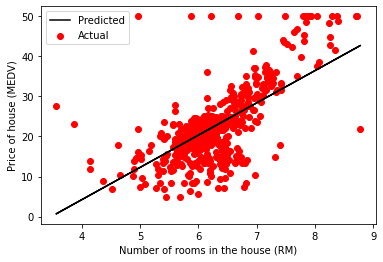

Iteration: 40000, Cost = 21.97096839400446, Weights = [-29.40677065   8.27460506]


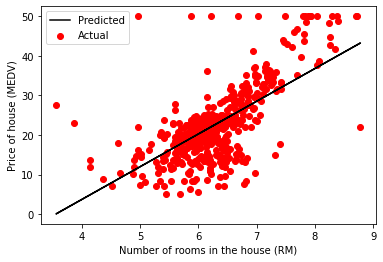

Iteration: 45000, Cost = 21.906400161403212, Weights = [-30.52008984   8.44962448]


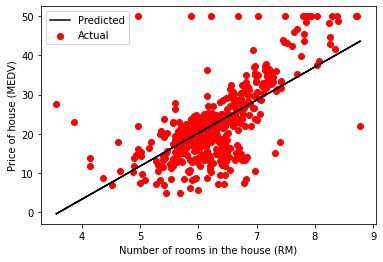

Iteration: 50000, Cost = 21.866256296923606, Weights = [-31.39793888   8.5876268 ]


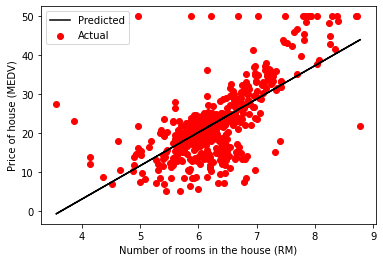

Iteration: 55000, Cost = 21.84129774082824, Weights = [-32.09012036   8.69644123]


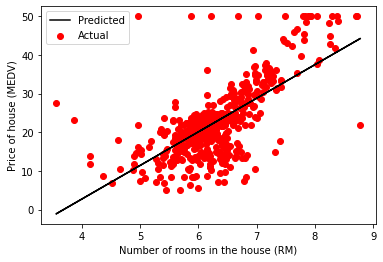

Iteration: 60000, Cost = 21.825780312936317, Weights = [-32.6359035    8.78224111]


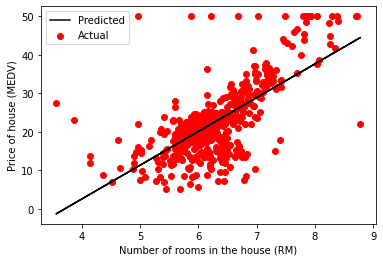

Iteration: 65000, Cost = 21.81613269680576, Weights = [-33.06625196   8.84989407]


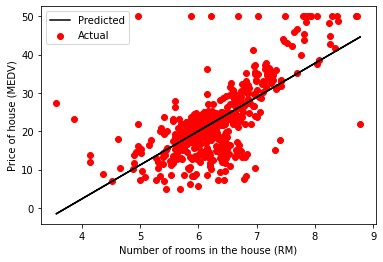

Iteration: 70000, Cost = 21.810134505762054, Weights = [-33.4055805    8.90323824]


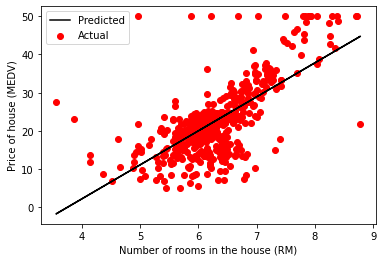

Iteration: 75000, Cost = 21.806405263707866, Weights = [-33.6731401    8.94529996]


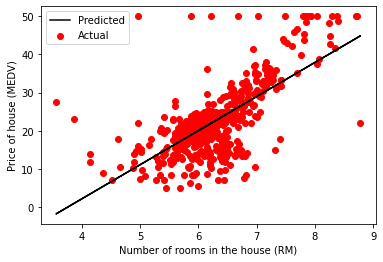

Iteration: 80000, Cost = 21.804086690291754, Weights = [-33.88411008   8.97846551]


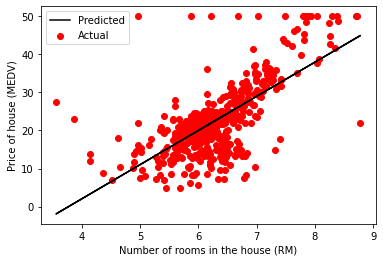

Iteration: 85000, Cost = 21.802645168768656, Weights = [-34.05045932   9.00461646]


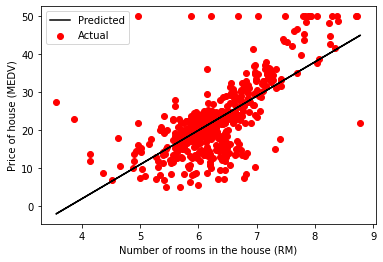

Iteration: 90000, Cost = 21.80174893477965, Weights = [-34.18162522   9.0252364 ]


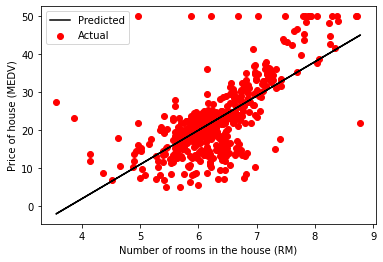

Iteration: 95000, Cost = 21.80119172120345, Weights = [-34.28504917   9.04149517]


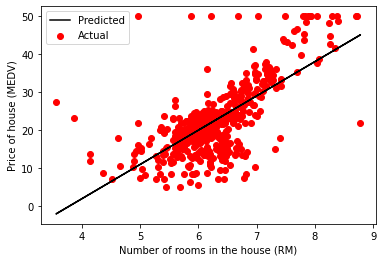

Iteration: 100000, Cost = 21.80084528603885, Weights = [-34.36659865   9.05431516]


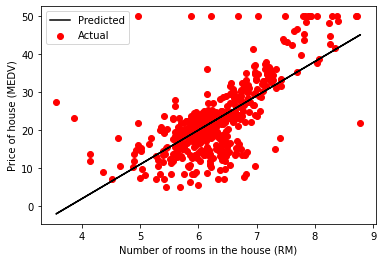

Iteration: 105000, Cost = 21.800629897670014, Weights = [-34.43090019   9.06442369]


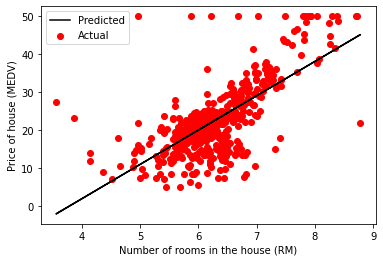

Iteration: 110000, Cost = 21.800495984735726, Weights = [-34.48160177   9.07239424]


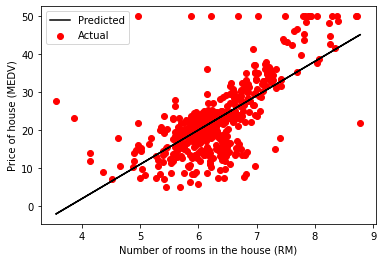

Iteration: 115000, Cost = 21.80041272734321, Weights = [-34.52157983   9.07867899]


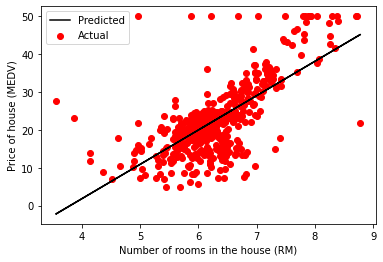

Iteration: 120000, Cost = 21.80036096390866, Weights = [-34.55310241   9.0836345 ]


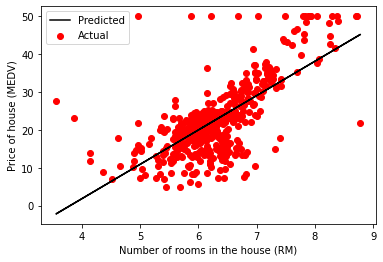

Iteration: 125000, Cost = 21.80032878114296, Weights = [-34.57795788   9.0875419 ]


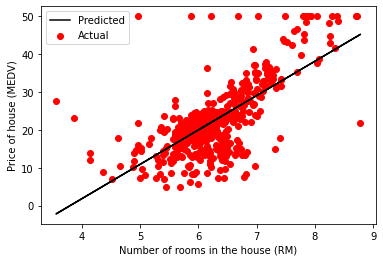

Iteration: 130000, Cost = 21.800308772223204, Weights = [-34.59755634   9.09062288]


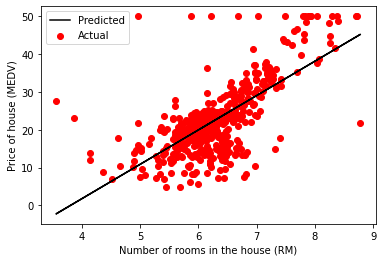

Iteration: 135000, Cost = 21.800296332121764, Weights = [-34.61300968   9.09305222]


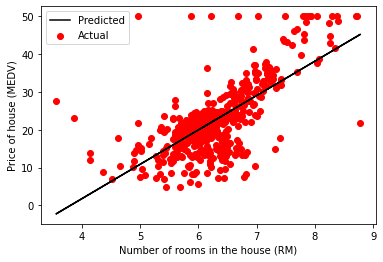

Iteration: 140000, Cost = 21.80028859776501, Weights = [-34.62519459   9.09496775]


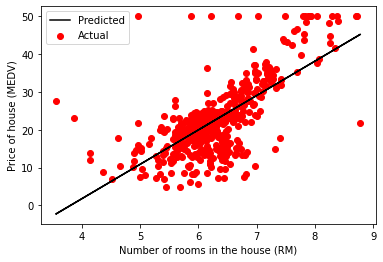

Iteration: 145000, Cost = 21.800283789100483, Weights = [-34.63480235   9.09647814]


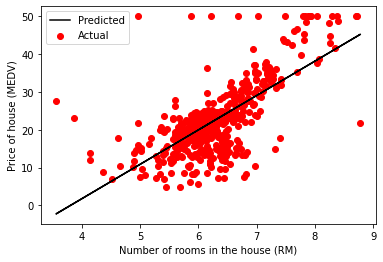

Iteration: 150000, Cost = 21.80028079988721, Weights = [-34.64237671   9.09766887]


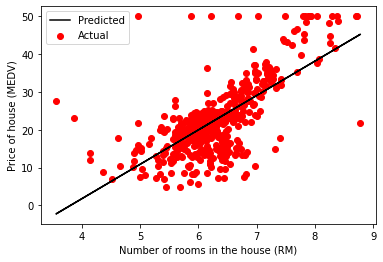

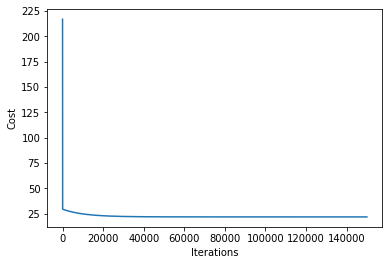

In [10]:
# call the fit function and display the results
n_iter = 150000
x = boston_data["RM"]
X = np.column_stack((np.ones(len(x)),x))
print(X)
Y = boston_data["MEDV"]
print(Y)
fit(n_iter,X,Y,'RM')


Weights by closed form:  [-34.67062078   9.10210898]


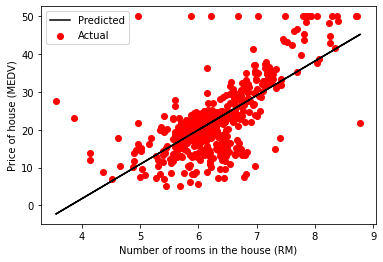

In [11]:
## Task 1
# Get weights using the closed form
from numpy.linalg import inv
X1 = inv(np.matmul(np.transpose(X) , X))
X1 = np.matmul(X1,np.transpose(X))
Wp = np.matmul(X1,Y)
print('Weights by closed form: ',Wp)
plot_line(X,Wp,Y,'RM')

In [17]:
def fit_closed_form(X,Y):
    return np.matmul(np.matmul(inv(np.matmul(np.transpose(X),X)),np.transpose(X)),Y)
W = fit_closed_form(X,Y)
W

array([34.55384088, -0.95004935])

[ 41.34587447 -33.91605501]


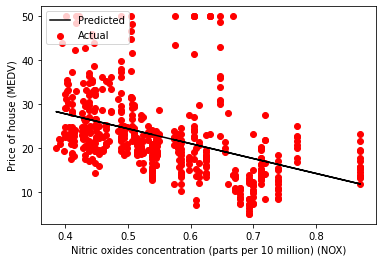

In [12]:
x = boston_data["NOX"]
X = np.column_stack((np.ones(len(x)),x))
X1 = inv(np.matmul(np.transpose(X) , X))
X1 = np.matmul(X1,np.transpose(X))
Wp = np.matmul(X1,Y)
print(Wp)
plot_line(X,Wp,Y,'NOX')


[34.55384088 -0.95004935]


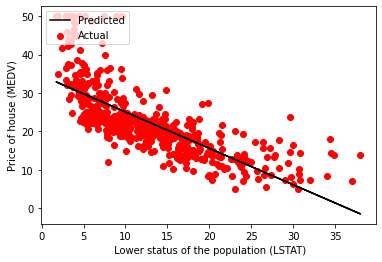

In [13]:
x = boston_data["LSTAT"]
X = np.column_stack((np.ones(len(x)),x))
X1 = inv(np.matmul(np.transpose(X) , X))
X1 = np.matmul(X1,np.transpose(X))
Wp = np.matmul(X1,Y)
print(Wp)
plot_line(X,Wp,Y,'LSTAT')

Weights: [-34.67062078   9.10210898]


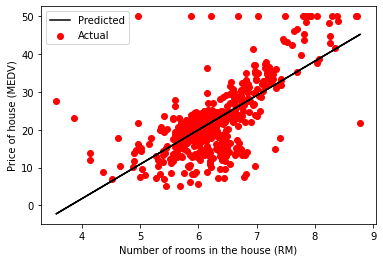

In [14]:
## Task 2
from sklearn.linear_model import LinearRegression
x = boston_data["RM"]
X = np.column_stack((np.ones(len(x)),x))
reg = LinearRegression().fit(X,Y)
W = np.zeros(2)
W[0] = reg.coef_[0] + reg.intercept_
W[1] = reg.coef_[1]
print('Weights:',W)
plot_line(X,W,Y,'RM')


Weights: [ 41.34587447 -33.91605501]


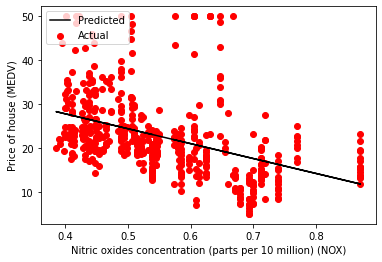

In [15]:
x = boston_data["NOX"]
X = np.column_stack((np.ones(len(x)),x))
reg = LinearRegression().fit(X,Y)
W = np.zeros(2)
W[0] = reg.coef_[0] + reg.intercept_
W[1] = reg.coef_[1]
print('Weights:',W)
plot_line(X,W,Y,'NOX')

Weights: [34.55384088 -0.95004935]


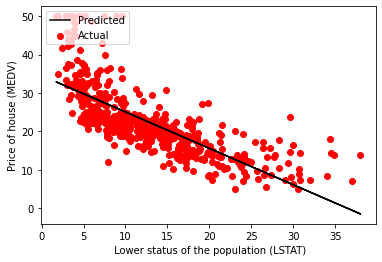

In [16]:
x = boston_data["LSTAT"]
X = np.column_stack((np.ones(len(x)),x))
reg = LinearRegression().fit(X,Y)
W = np.zeros(2)
W[0] = reg.coef_[0] + reg.intercept_
W[1] = reg.coef_[1]
print('Weights:',W)
plot_line(X,W,Y,'LSTAT')